## Intro to Machine Learning Part 3

This workshop will guide you through the basics of using unsupervised machine learning techniques using the __pandas__ and __scikit-learn__ libraries. The focus of this workshop is not to guide you through the specifics of manipulating your data at each step but to provide a high-level overview of what you need to do to create a simple regression or classification model.

The slides to the workshop can be found [here](https://tinyurl.com/cads-ml-intro-2).

### Terms You Need to Know
- Data Set: a collection of data typically presented in tabular format
- Feature: a column in a data set; a measurable quality
- Tidy data: structuring data sets in a standard manner; each row represents a single observation
- Imputation: the process of replacing missing data with substituted data
- Encoding: process of representing data into a different form; commonly used to represent categorical as numerical data for many models like linear regression and logistic regression
- Feature scaling: the processing of preparing data to minimize overfitting; use to increase performance of models (i.e. distance-based and gradient descent-based algorithms) by making the values of features (or range) more similar to each other
- Standardization: transform feature values to have zero mean and a variance of 1; make data unitless and features comparable to each other
- Normalization: transform feaure values to a range of [0, 1] or [-1, 1]; a.k.a. min-max scaling; useful when data doesn't follow normal distribution
- Training data set: the subset of a data set used for training a machine learning model
- Validation data set: the subset of the training data set used to tune hyperparameters
- Testing Data Set: the subset of a data set used to assess performance on a machine learning model after training
- Model parameter: a variable which is used to define a model and can be estimated from the data
- Model hyperparameter: a variable which is used to tune a model and cannot be estimated from data (i.e. you have to adjust it yourself)
- Supervised learning: a machine learning task where the data set has an experimental or known value the model will predict (i.e. the data set is labeled)
- Unsupervised learning: a machine learning task where there is no known value the model will predict for in the data set (i.e. the data set is unlabled or untagged); the model will find patterns or groupings in the data set not specified beforehand
- Cross Validation: used to ensure the model is robust and is not overfitted; the most common method is K-fold cross validation where the data set is split into subsets and the model is trained and assessed on those subsets
- Metric: values that can be used to make a decision (ie. tell you how well your model is performing and how well it is comparing to other models)
- Underfitting: occurs when a model performs poorly on the training and other data
- Overfitting: occurs when a model fits and performs really well on the training data but performs poorly on other data
- Exporatory Data Analysis (EDA): process of investigating and analyze data sets to discover patterns and anomalies via statistical and visual methods

### Pipeline
Here are steps that are commonly taken by data scientists and ML engineers for their machine learning projects. At each step, there are questions to consider when constructing your pipeline. This guide will still be used as a basis, however, we will not go into the specifics at each step. I strongly encourage you to research each step to improve your own pipelines.

![Questions to ask for your ML pipeline](pipeline.png)

### Clustering

The goal of clustering is to determine the grouping in a set of unlabeled data. The common clustering algorithms are:
- k-Means Clustering
- Hierarchical Clustering
- Mixture of Gaussians
- t-SNE Clustering

#### k-Means Clustering

##### Data Collection

- _Where are you getting this data from?_
- _Is the entire data set relevant?_

<br />

https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

> "This data set is created only for the learning purpose of the customer segmentation concepts, also known as market basket analysis."
<br /><br />"You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data."
<br /><br />"You own the mall and want to understand the different customer segments that exist and can be targeted by your marketing team. Can you build a machine learning model to identify the customer segments?"

<br />

The __pandas__ package can be used to easily manipulate tabular data (i.e. data mungling/wrangling), prepare it for visualization, and run statistical analysis on it. It uses tables, or an object of rows and columns, called _data frames_ to format data. The package contains several functions to read data in various formats like CSV, Excel, SQL, and HTML among many others.

In [18]:
import numpy as np
import pandas as pd
customers = pd.read_csv("mall_customers.csv")
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##### Data Preparation

- _Is the data "tidy?"_
- _Can features be dropped or created?_
- _What modifications will the data need to train a model on it?_


In [7]:
# 1. Does my data contain only numerical features? If not, should I encode or remove/drop the categorical features?
customers.info()
# customers.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
# 2. Is there any duplicated data or rows that need to be dropped?
customers.duplicated().sum()

0

In [10]:
# 3. Is there any missing data? If so, should we impute it or drop those features with the missing data?
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

The __matplotlib__ and __seaborn__ packages can be used to visualize data in a format that is easily read and understood. Here, we are using matplotlib and seaborn to view the histogram and count plot of the features to perform exploratory data analysis (EDA).

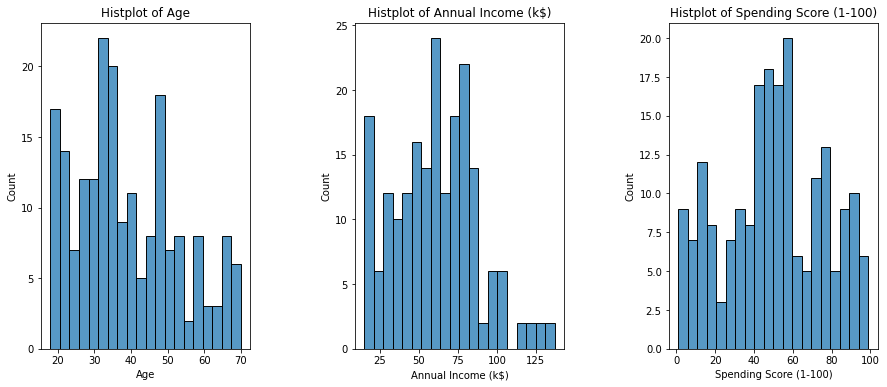

In [16]:
# 4. What does the distribution of the features tell us?
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(1 , figsize = (15, 6))
n = 0 
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(customers[x] , bins = 20)
    plt.title('Histplot of {}'.format(x))
plt.show()

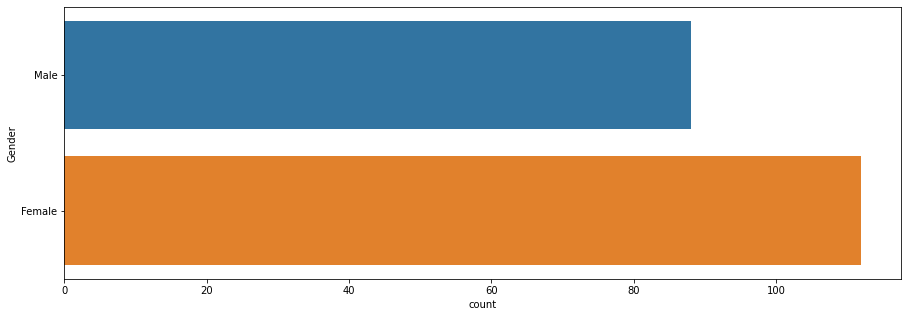

In [21]:
plt.figure(1 , figsize = (15, 5))
sns.countplot(y = 'Gender' , data = customers)
plt.show()

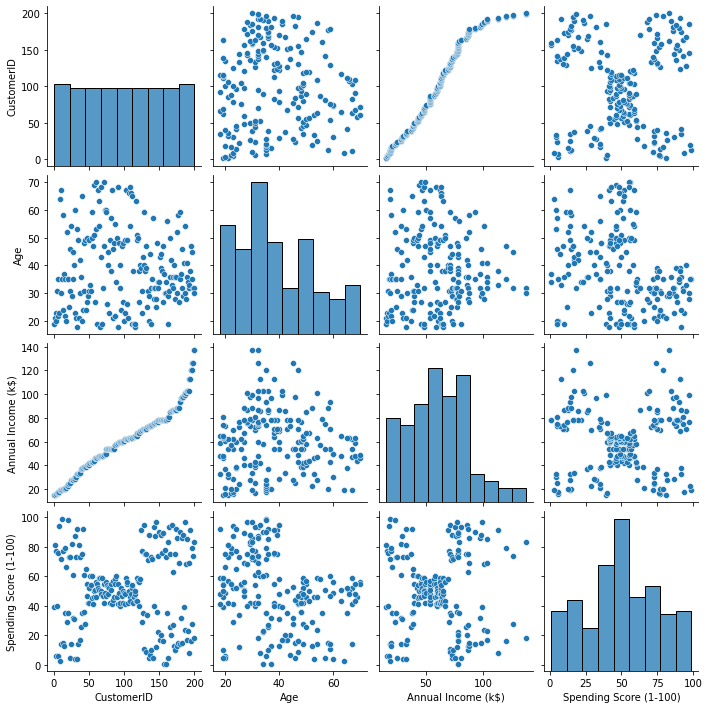

In [45]:
# Does the pairplot tell anything?
sns.pairplot(customers)
# plt.title('Mall Customers Pairplot', fontsize=20)
plt.show()

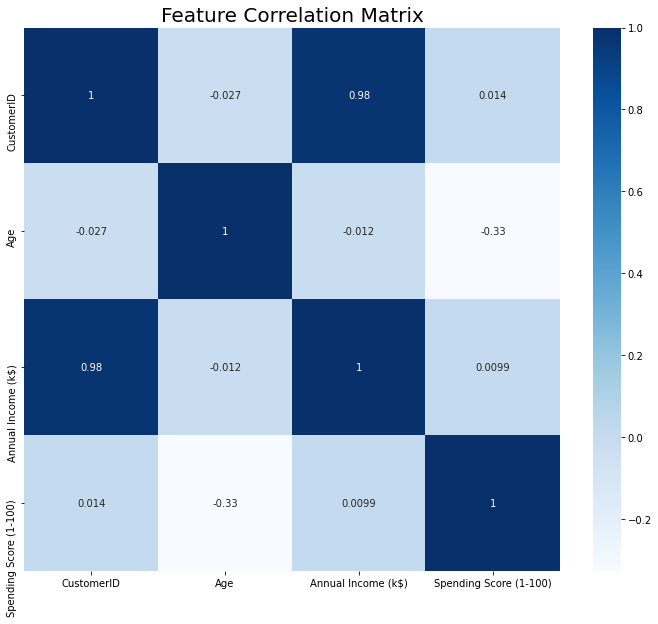

In [24]:
# Does the feature correlation matrix show any highly correlated features?
plt.figure(figsize=(12,10))
sns.heatmap(customers.corr(), annot=True, cmap='Blues')
plt.title("Feature Correlation Matrix", fontsize=20)
plt.show()

##### Model Training

- _Which model makes sense for my data and predictions?_
- _How can the data set be split to train and test the model without overfitting?_

The __scikit-learn__ package has many machine learning models you can use across supervised and unsupervised learning. Here, we will use the package to fit and train a logistic regression model.

You can also tune your model's hyperparameters here like change the penalty function or the solver (i.e. optimization algorithm). We do not use any hyperparameters here because it is outside the scope of this workshop. You can look up all the hyperparameters available on the [package documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

###### Segmentation with Age and Spending Score

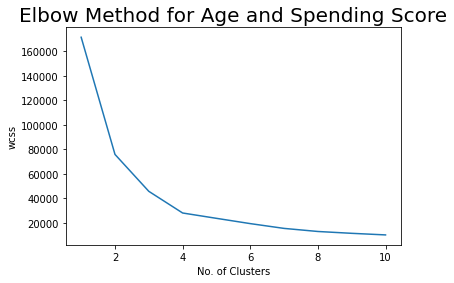

In [36]:
x = customers[['Age' , 'Spending Score (1-100)']].values

# elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Age and Spending Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [33]:
# fit and train model
age_score_model = KMeans(n_clusters = 4, init='k-means++', n_init = 10, max_iter=300, random_state = 0)
age_score_model.fit(x)

KMeans(n_clusters=4, random_state=0)

###### Segmentation with Annual Income and Spending Score

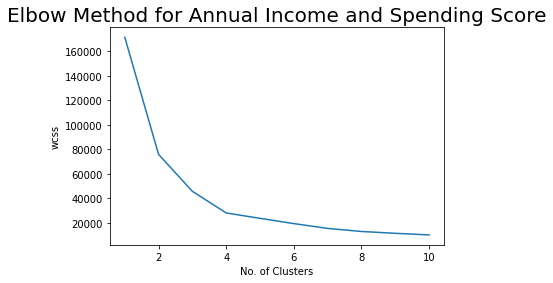

<Figure size 864x720 with 0 Axes>

In [40]:
x2 = customers[['Annual Income (k$)', 'Spending Score (1-100)']].values

# elbow method
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x2)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Annual Income and Spending Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [35]:
# fit and train model
income_score_model = KMeans(n_clusters = 5, init='k-means++', n_init = 10, max_iter=300, random_state = 0)
income_score_model.fit(x2)

KMeans(n_clusters=5, random_state=0)

##### Model Evaluation

- _How can you visually assess your model?_
- _Do other models show a more distinct pattern?_

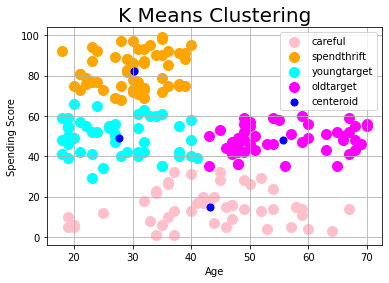

In [47]:
y_means = age_score_model.fit_predict(x)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'careful')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'orange', label = 'spendthrift')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'youngtarget')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'oldtarget')
plt.scatter(age_score_model.cluster_centers_[:,0], age_score_model.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

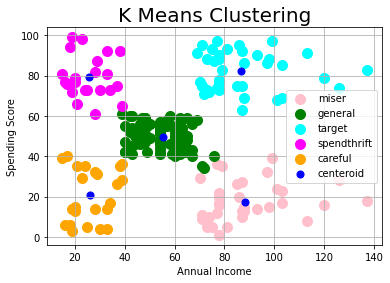

In [46]:
y_means = income_score_model.fit_predict(x2)
plt.scatter(x2[y_means == 0, 0], x2[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x2[y_means == 1, 0], x2[y_means == 1, 1], s = 100, c = 'green', label = 'general')
plt.scatter(x2[y_means == 2, 0], x2[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x2[y_means == 3, 0], x2[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x2[y_means == 4, 0], x2[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(income_score_model.cluster_centers_[:,0], income_score_model.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

### Dimensionality Reduction

The goal of dimensionality reduction is to determine the grouping in a set of unlabeled data. The common dimensionality reduction algorithms are:
- Principal Component Analysis (PCA)
- Latent Discriminant Analysis (LDA)
- Kernel PCA
- t-SNE

We will not cover dimensionality reduction for the portion of this workshop because of time.